# MMAI 894 - Deep Learning
## Dr. Ofer Shai
## Team Bloor
### Pothole Detection Model
Benchmark Model - LeNet-5


### 1. Import Modules and Libraries

In [ ]:
# Install module for importing Keras Tuner

!pip install -q -U keras-tuner

In [ ]:
# Import modules
from sklearn.datasets import fetch_openml
import numpy as np
from numpy import expand_dims
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import os
import random as rn
import cv2
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from keras.utils.np_utils import to_categorical
import kerastuner as kt

np.random.seed(123)
tf.random.set_seed(123)

### 2. Load Data


*   Data is loaded from Dropbox
*   There are two (2) datasets that will be uploaded as zipped files and then unzipped in this notebook



In [ ]:
!wget https://www.dropbox.com/s/u6ymk5ylk9axsuw/no_pothole_v2.zip?dl=0

--2021-04-03 03:28:02--  https://www.dropbox.com/s/u6ymk5ylk9axsuw/no_pothole_v2.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u6ymk5ylk9axsuw/no_pothole_v2.zip [following]
--2021-04-03 03:28:02--  https://www.dropbox.com/s/raw/u6ymk5ylk9axsuw/no_pothole_v2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7144022e0386a150832f49d661.dl.dropboxusercontent.com/cd/0/inline/BL4v1dIvdgvZ51aYi4ao3497bpM9ttXzbsjd803R-YSVYEFYt82w77r0ngpVrby9uIVfG0dQ63lV8sPtVwZLF9AjNzpVrdHUdzQOcUYrMBiPvNxBY-g991gzyf3qrisXP_Ji69vCoT38gGTBQN6iBt9c/file# [following]
--2021-04-03 03:28:03--  https://uc7144022e0386a150832f49d661.dl.dropboxusercontent.com/cd/0/inline/BL4v1dIvdgvZ51aYi4ao3497bpM9ttXzbsjd803R-YSVYEFYt82w77r0ngpVrby9uIV

In [ ]:
!wget https://www.dropbox.com/s/edhsf4jxdwdbddz/potholes.zip?dl=0

--2021-04-03 03:28:14--  https://www.dropbox.com/s/edhsf4jxdwdbddz/potholes.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/edhsf4jxdwdbddz/potholes.zip [following]
--2021-04-03 03:28:14--  https://www.dropbox.com/s/raw/edhsf4jxdwdbddz/potholes.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e5bd3bfeeab028ba4b1c6db36.dl.dropboxusercontent.com/cd/0/inline/BL6n40tXON4q-X1RJ8Fkh3G4meHmM1Z1NUTj7nV0TSms_uIlXF-v_s5g-DGAnV3CMhG4xumYrgB9xS5t3vcm5TCJSwDA43hQo_oTJTfy0SHu3LMvWsCxKGGTrzaDtvIE4xvbcwsaWUBNKVtLXwpS5EDK/file# [following]
--2021-04-03 03:28:14--  https://uc1e5bd3bfeeab028ba4b1c6db36.dl.dropboxusercontent.com/cd/0/inline/BL6n40tXON4q-X1RJ8Fkh3G4meHmM1Z1NUTj7nV0TSms_uIlXF-v_s5g-DGAnV3CMhG4xumYrgB9xS5t3v

In [ ]:
# Unzip the No Potholes dataset
# Use '%%capture' to hide output

%%capture
!unzip -o '/content/no_pothole_v2.zip?dl=0'

In [ ]:
# Unzip the Potholes dataset
# Use '%%capture' to hide output

%%capture
!unzip -o '/content/potholes.zip?dl=0'

### 3. Data Preprocessing

The following steps will be taken to preprocess the data:
1.   Read in the images from the datasets and resize them
2.   Assign each image a label (i.e. No Pothole vs Pothole)
3.   Plot sample images to assure the labels have been assigned correctly
4.   Encode the labels
5. Split the data into training and test sets



In [ ]:
# This function reads in the images one at a time through the 'for' loop and resizes them and assigns a label

def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass

In [ ]:
# Running the 'make_train_data' function defined above on the two (2) datasets
# X will be a list of images, stored as an array
# Z will be a list of labels 

X=[]
Z=[]
IMG_SIZE=250

no_potholes='../content/no_pothole_v2/'
potholes='../content/potholes/'

make_train_data('NO POTHOLES',no_potholes)
make_train_data('POTHOLES',potholes)

100%|██████████| 718/718 [00:06<00:00, 102.81it/s]


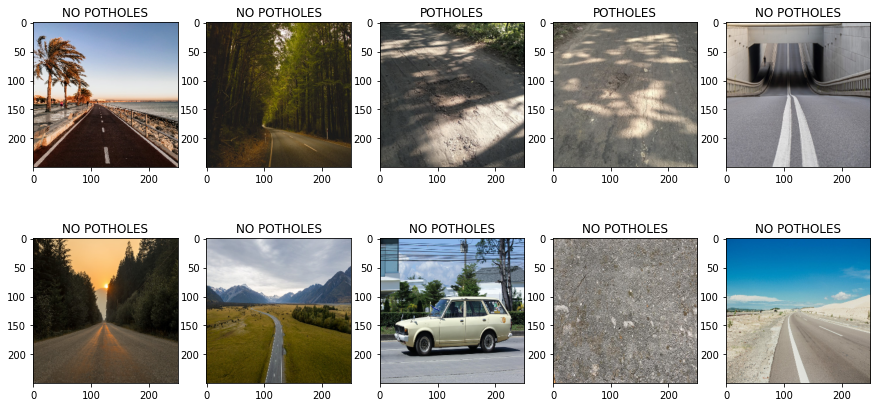

In [ ]:
# Plotting ten (10) randomly selected images, along with their assigned labels as the title

fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

In [ ]:
# Encoding the labels and assigning the encoded labels to 'Y'

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(Z)

print(Y)

X=np.array(X)
X=X/255

# Split data into training and test sets
# Assigning 15% of the data to the test sets and remaining to the training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state=42)

[0 0 0 ... 1 1 1]


In [ ]:
# Printing shapes of X, X_train, and X_test to assure the split was done correctly

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1534, 250, 250, 3)
(1107, 250, 250, 3)
(231, 250, 250, 3)
(196, 250, 250, 3)


### 4. Modelling - Training and Building Model


*   Building the model architecture and defining hyperparameters to be tuned
*   Running a search to find the optimal hyperparameter values
*   Building the model using the optimal hyperparameter values



In [ ]:
# Build Model using LeNet-5 architecture

model = keras.Sequential()

# First convolutional layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(250,250,3), padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Flatten())

# First Dense Layer
model.add(Dense(units=120, activation='tanh'))

# Second Dense Layer
model.add(Dense(units=84, activation='tanh'))

# Output Layer
model.add(Dense(units=1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 246, 246, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 123, 123, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 119, 16)      2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 59, 59, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 55696)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               6683640   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
# Train model

history = model.fit(x=X_train, y=Y_train, batch_size=32, epochs=50, verbose=1,validation_data=(X_val, Y_val))

Epoch 1/50
35/35 [==============================] - 3s 37ms/step - loss: 1.3053 - accuracy: 0.5077 - val_loss: 0.5674 - val_accuracy: 0.7959
Epoch 2/50
35/35 [==============================] - 1s 22ms/step - loss: 0.5446 - accuracy: 0.7617 - val_loss: 0.4466 - val_accuracy: 0.8010
Epoch 3/50
35/35 [==============================] - 1s 22ms/step - loss: 0.4697 - accuracy: 0.7871 - val_loss: 0.4015 - val_accuracy: 0.8418
Epoch 4/50
35/35 [==============================] - 1s 22ms/step - loss: 0.4445 - accuracy: 0.8008 - val_loss: 0.3990 - val_accuracy: 0.8163
Epoch 5/50
35/35 [==============================] - 1s 22ms/step - loss: 0.4040 - accuracy: 0.8340 - val_loss: 0.3558 - val_accuracy: 0.8622
Epoch 6/50
35/35 [==============================] - 1s 22ms/step - loss: 0.3943 - accuracy: 0.8348 - val_loss: 0.3625 - val_accuracy: 0.8571
Epoch 7/50
35/35 [==============================] - 1s 22ms/step - loss: 0.3536 - accuracy: 0.8633 - val_loss: 0.3436 - val_accuracy: 0.8520
Epoch 8/50
35

### 5. Model Evaluation

In [ ]:
# Evaluate model

test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print("Test Loss: {:.3f}, Test Accuracy: {:.3f}".format(test_loss, test_accuracy))


8/8 [==============================] - 0s 13ms/step - loss: 0.5936 - accuracy: 0.8268
Test Loss: 0.594, Test Accuracy: 0.827


In [ ]:
# Generate Classification Report
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

target_names = ['No Pothole', 'Pothole']

print(classification_report(Y_test, y_pred.round(), target_names=target_names))

              precision    recall  f1-score   support

  No Pothole       0.84      0.82      0.83       120
     Pothole       0.81      0.84      0.82       111

    accuracy                           0.83       231
   macro avg       0.83      0.83      0.83       231
weighted avg       0.83      0.83      0.83       231



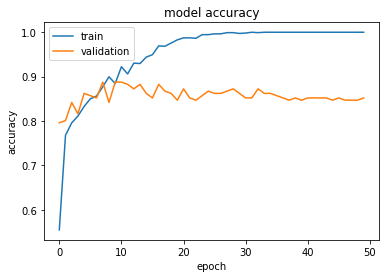

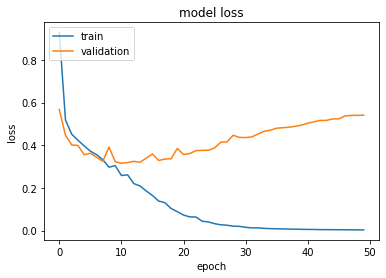

In [ ]:
# Plot training and validation accuracy and loss over epochs

#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

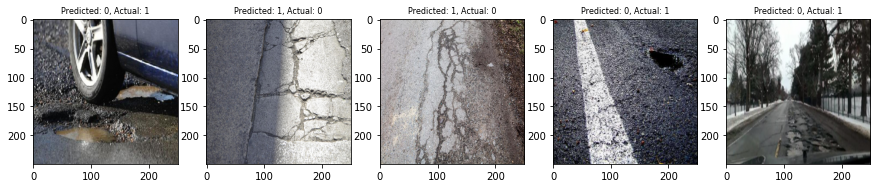

In [ ]:
# Plotting incorrect predictions

# Assigning the predicted and actual outputs to a class (0 or 1)
Y_pred_classes = y_pred.round()
Y_test_classes = Y_test.round()

# Creating a blank list for all incorrect predictions
inc_pred = []
    
# Comparing the predicted and actual outputs and adding the index of the incorrect predictions to the inc_pred list
for x in range(0,len(Y_pred_classes)):
  if Y_pred_classes[x] != Y_test_classes[x]:
    inc_pred.append(x)

# Creating a sample of the first five (5) incorrect predictions
inc_pred_sample = inc_pred[:5]
inc_pred_sample2 = inc_pred[5:10]

# Plotting the sample of five (5) incorrect predictions
n_plots = len(inc_pred_sample2)

f, ax2=plt.subplots(1, 5, figsize=(20,20))
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
f.set_size_inches(15,15)

for i in range(0,n_plots):
    value = X_test[inc_pred_sample2[i]][:,:,::-1]
    ax2[i].imshow(value.reshape(250,250,3))
    ax2[i].set_title("Predicted: {}, Actual: {}".format(int(Y_pred_classes[inc_pred_sample2[i]][0]),Y_test_classes[inc_pred_sample2[i]]), fontsize=8)
    ax2[i].set_aspect('equal')


# Extra Work - Remove before submission

In [ ]:
# import random image

# test_path = '../content/test_image13.jpg'

# test_img = cv2.imread(test_path,cv2.IMREAD_COLOR)
# test_img = cv2.resize(test_img, (IMG_SIZE,IMG_SIZE))

# fig1,ay=plt.subplots(1,1)
# plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
# fig1.set_size_inches(15,15)

# ay.imshow(test_img)

In [ ]:
# test_img_dim = expand_dims(test_img, axis=0)

# test_img_dim.shape

In [ ]:
# predict class of random image

# test_pred = hypermodel.predict(test_img_dim)

# print(test_pred)

# prediction = test_pred.round()

# print(prediction)

# if prediction == 0:
#   print("This image has no potholes")

# else:
#   print("This image has potholes")